In [0]:
df = spark.read.parquet("dbfs:/student-groups/Group_4_4/data_12M/df_joined_1Y_features_plus_gf.parquet")
df.printSchema()


root
 |-- ORIGIN: string (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- flight_id: string (nullable = true)
 |-- prediction_utc: timestamp (nullable = true)
 |-- origin_obs_utc: timestamp (nullable = true)
 |-- asof_minutes: long (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- DISTANCE_GROUP: integer (nullable = true)
 |-- HourlyDryBulbTemperature: double (nullable = true)
 |-- HourlyDewPointTemperature: double (nullable = true)
 |-- HourlyWetBulbTemperature: double (nullable = true)
 |-- HourlyPrecipitation: double (nullable = true)
 |-- HourlyWi

In [0]:
import pyspark.sql.functions as F

target_del15 = "DEP_DEL15"

num_cols = [
    "dep_delay15_24h_rolling_avg_by_origin_dayofweek",
    "dep_delay_24h_rolling_avg_by_origin_dayofweek",
    "dep_delay15_24h_rolling_avg_by_origin_carrier",
    "dep_delay15_24h_rolling_avg_by_origin",
    "dep_delay_24h_rolling_avg_by_origin_carrier",
    "dep_delay_24h_rolling_avg_by_origin",
    "CRS_DEP_TIME",
    "DEP_HOUR",
    "peak_travel_hour",
    "peak_travel_month",
    "HourlyRelativeHumidity",
    "HourlyPrecipitation",
    "HourlyWindSpeed",
    "DISTANCE",
    "DISTANCE_GROUP",
    "HourlyVisibility",
    "pagerank",
    "degree",
    "betweenness"
]

corr_rows_del15 = []
for c in num_cols:
    corr_val = df.select(F.corr(c, target_del15)).first()[0]
    corr_rows_del15.append((c, float(corr_val) if corr_val is not None else None))

corr_del15 = spark.createDataFrame(corr_rows_del15, ["feature", "corr_with_DEP_DEL15"])
corr_del15 = corr_del15.orderBy(F.desc("corr_with_DEP_DEL15"))

corr_del15.show(50, False)


+-----------------------------------------------+--------------------+
|feature                                        |corr_with_DEP_DEL15 |
+-----------------------------------------------+--------------------+
|dep_delay15_24h_rolling_avg_by_origin_dayofweek|0.249205826885332   |
|dep_delay15_24h_rolling_avg_by_origin_carrier  |0.20246562923363093 |
|dep_delay15_24h_rolling_avg_by_origin          |0.19467637786470954 |
|dep_delay_24h_rolling_avg_by_origin_dayofweek  |0.17913578863912785 |
|CRS_DEP_TIME                                   |0.1652198547026689  |
|DEP_HOUR                                       |0.1649162986217872  |
|dep_delay_24h_rolling_avg_by_origin            |0.16167210472906873 |
|dep_delay_24h_rolling_avg_by_origin_carrier    |0.1558854876924602  |
|peak_travel_hour                               |0.13494229989312595 |
|HourlyRelativeHumidity                         |0.07156559457009189 |
|peak_travel_month                              |0.05237212035377359 |
|degre

In [0]:
target_delay = "DEP_DELAY"

corr_rows_delay = []
for c in num_cols:
    corr_val = df.select(F.corr(c, target_delay)).first()[0]
    corr_rows_delay.append((c, float(corr_val) if corr_val is not None else None))

corr_delay = spark.createDataFrame(corr_rows_delay, ["feature", "corr_with_DEP_DELAY"])
corr_delay = corr_delay.orderBy(F.desc("corr_with_DEP_DELAY"))

corr_delay.show(50, False)


+-----------------------------------------------+---------------------+
|feature                                        |corr_with_DEP_DELAY  |
+-----------------------------------------------+---------------------+
|dep_delay15_24h_rolling_avg_by_origin_dayofweek|0.18999795273364203  |
|dep_delay_24h_rolling_avg_by_origin_dayofweek  |0.16858222904226294  |
|dep_delay15_24h_rolling_avg_by_origin_carrier  |0.15515733741606386  |
|dep_delay15_24h_rolling_avg_by_origin          |0.15178854702187441  |
|dep_delay_24h_rolling_avg_by_origin_carrier    |0.14935597729106728  |
|dep_delay_24h_rolling_avg_by_origin            |0.14920924282161058  |
|CRS_DEP_TIME                                   |0.09851617546169579  |
|DEP_HOUR                                       |0.09842586180932164  |
|peak_travel_hour                               |0.08405282453251871  |
|HourlyRelativeHumidity                         |0.06006813145876655  |
|peak_travel_month                              |0.0425265351601

/root/.ipykernel/61697/command-4704160420530685-1555497977:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


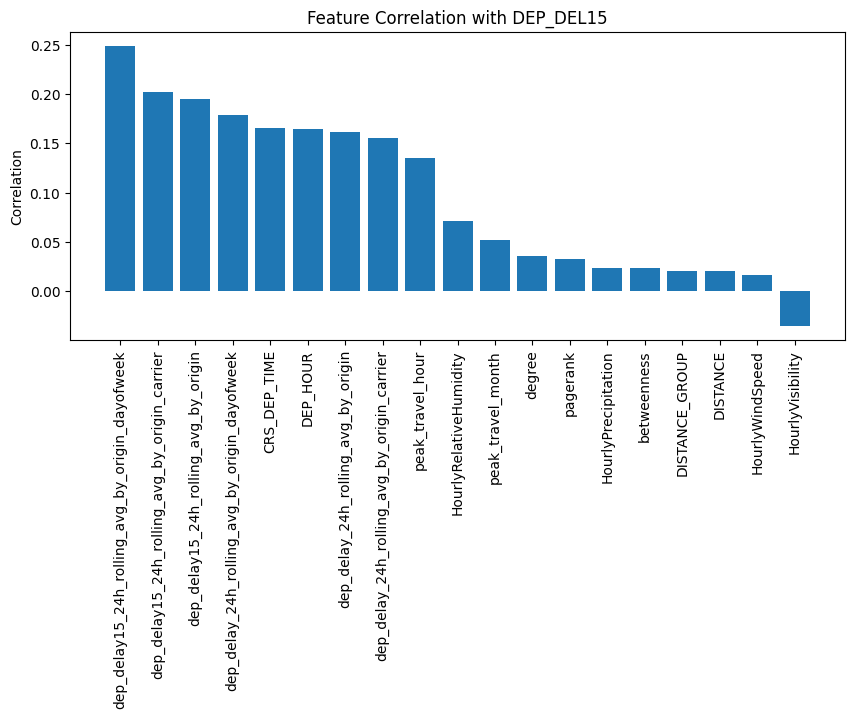

In [0]:
import matplotlib.pyplot as plt

pdf_del15 = corr_del15.toPandas().dropna()

plt.figure(figsize=(10, 4))
plt.bar(pdf_del15["feature"], pdf_del15["corr_with_DEP_DEL15"])
plt.title("Feature Correlation with DEP_DEL15")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/root/.ipykernel/61697/command-4704160420530686-1567477616:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


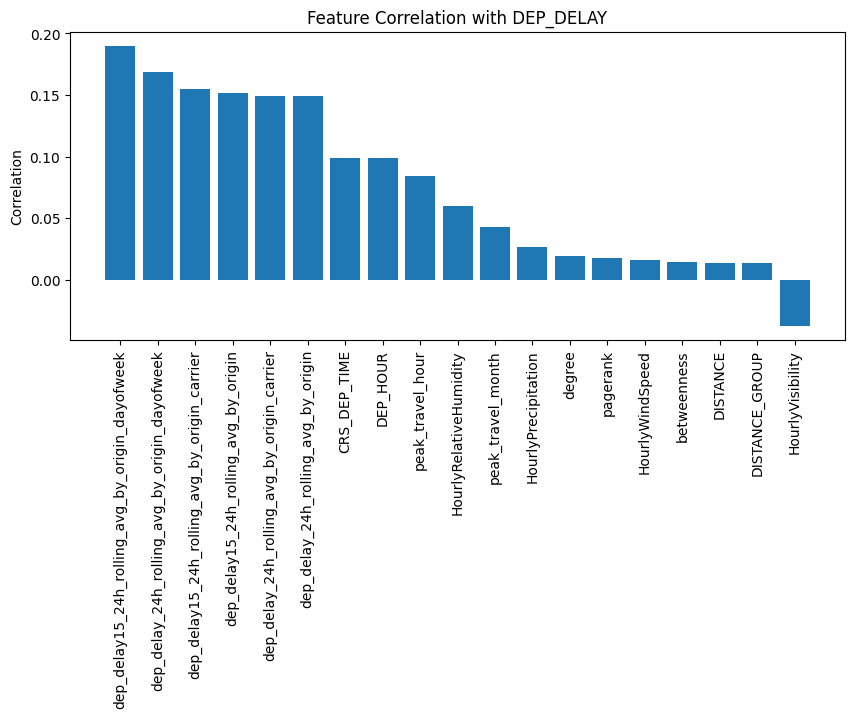

In [0]:
pdf_delay = corr_delay.toPandas().dropna()

plt.figure(figsize=(10, 4))
plt.bar(pdf_delay["feature"], pdf_delay["corr_with_DEP_DELAY"])
plt.title("Feature Correlation with DEP_DELAY")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
